In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [5]:
DAY=int(os.environ["THE_DAY"])

KeyError: 'THE_DAY'

In [6]:
print "the day", DAY

the day

NameError: name 'DAY' is not defined

In [3]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [4]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [5]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [6]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 1
store_mean_0-lag0-offset1 family_0-lag0-offset1 city_0-lag0-offset1 cluster_mv36-lag0-offset1 cluster_0-lag0-offset1 city_mv36-lag0-offset1 item_mean_0-lag0-offset1 class_0-lag0-offset1 type_0-lag0-offset1 type_mv36-lag0-offset1 state_mv36-lag0-offset1 class_mv36-lag0-offset1 state_0-lag0-offset1 family_mv36-lag0-offset1 holiday_0-lag0-offset0 d900-lag0-offset0 wage_0-lag0-offset0 y_0-lag0-offset1 y_0-lag1-offset1 y_0-lag2-offset1 y_0-lag3-offset1 y_0-lag4-offset1 y_0-lag5-offset1 y_0-lag6-offset1 sales_ma_224-lag0-offset1 sales_ma_14-lag0-offset1 sales_ma_28-lag0-offset1 sales_ma_112-lag0-offset1 sales_ma_7-lag0-offset1 sales_ma_3-lag0-offset1 sales_ma_56-lag0-offset1 sales_week_season_ma_p7-lag6-offset1 sales_week_season_ma_p4-lag6-offset1 sales_week_season_ma_p13-lag6-offset1 sales_week_season_ma_p2-lag6-offset1 sales_week_season_ma_p3-lag6-offset1 loaded (54, 4100, 1704) (54, 4100, 1704, 36)
CPU times: user 2min 39s, sys: 27.5 s, total: 3min 6s
Wall time: 3min 6

In [7]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [8]:
gc.collect()

0

In [9]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [10]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset1  family_0-lag0-offset1  city_0-lag0-offset1  \
1683                   1.546875               1.627930             1.714844   
1684                   1.312500               1.722656             1.834961   
1685                   1.383789               1.694336             1.823242   
1686                   1.216797               1.751953             1.890625   
1687                   1.533203               1.664062             1.812500   
1688                   1.501953               1.662109             1.800781   
1689                        NaN                    NaN                  NaN   

      cluster_mv36-lag0-offset1  cluster_0-lag0-offset1  \
1683                   1.636719                1.526367   
1684                   1.636719                1.576172   
1685                   1.634766                1.574219   
1686                   1.631836                1.590820   
1687                   1.626953                1.574219   
1688                   1.625000                1.550781   
1689                   1.626953                     NaN   

      city_mv36-lag0-offset1  item_mean_0-lag0-offset1  class_0-lag0-offset1  \
1683                1.864258                  2.003906              1.706055   
1684                1.866211                  2.191406              1.846680   
1685                1.865234                  2.173828              1.803711   
1686                1.862305                  1.844727              1.630859   
1687                1.856445                  1.675781              1.546875   
1688                1.854492                  1.651367              1.586914   
1689                1.856445                       NaN                   NaN   

      type_0-lag0-offset1  type_mv36-lag0-offset1  state_mv36-lag0-offset1  \
1683             1.553711                1.650391                 1.863281   
1684             1.637695                1.652344                 1.865234   
1685             1.593750                1.650391                 1.864258   
1686             1.621094                1.648438                 1.861328   
1687             1.607422                1.644531                 1.854492   
1688             1.577148                1.642578                 1.853516   
1689                  NaN                1.644531                 1.855469   

      class_mv36-lag0-offset1  state_0-lag0-offset1  family_mv36-lag0-offset1  \
1683                 1.671875              1.719727                  1.715820   
1684                 1.678711              1.834961                  1.717773   
1685                 1.679688              1.820312                  1.717773   
1686                 1.674805              1.885742                  1.715820   
1687                 1.670898              1.813477                  1.709961   
1688                 1.671875              1.803711                  1.708984   
1689                 1.676758                   NaN                  1.710938   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset1  y_0-lag1-offset1  y_0-lag2-offset1  y_0-lag3-offset1  \
1683          2.773438          2.080078          2.302734          2.484375   
1684          2.638672          2.773438          2.080078          2.302734   
1685          0.693359          2.638672          2.773438          2.080078   
1686          0.693359          0.693359          2.638672          2.773438   
1687    

In [11]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [12]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset1     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset1  0.0002     0.0  0.0002  0.0002   
2                     city_0-lag0-offset1     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset1     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset1  0.0827  0.0798  0.0824  0.0802   
7                    class_0-lag0-offset1  0.0071  0.0068  0.0073  0.0073   
8                     type_0-lag0-offset1     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset1  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset1     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset1     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset1  0.5249  0.5208  0.5359  0.5356   
18                       y_0-lag1-offset1  0.5276  0.5249  0.5208  0.5359   
19                       y_0-lag2-offset1  0.5549  0.5276  0.5249  0.5208   
20                       y_0-lag3-offset1  0.5438  0.5549  0.5276  0.5249   
21                       y_0-lag4-offset1  0.5431  0.5438  0.5549  0.5276   
22                       y_0-lag5-offset1  0.5308  0.5431  0.5438  0.5549   
23                       y_0-lag6-offset1  0.4994  0.5308  0.5431  0.5438   
24              sales_ma_224-lag0-offset1  0.5002  0.4986  0.4985  0.4984   
25               sales_ma_14-lag0-offset1  0.5092  0.5118  0.5132   0.516   
26               sales_ma_28-lag0-offset1  0.5029  0.5039  0.5041  0.5038   
27              sales_ma_112-lag0-offset1  0.4898  0.4901  0.4905  0.4904   
28                sales_ma_7-lag0-offset1  0.5092  0.5128  0.5133  0.5118   
29                sales_ma_3-lag0-offset1  0.5213  0.5104  0.5127  0.5173   
30               sales_ma_56-lag0-offset1  0.4955  0.4961  0.4962   0.496   
31   sales_week_season_ma_p7-lag6-offset1     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag6-offset1     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag6-offset1     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag6-offset1  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag6-offset1     0.0     0.0     0.0     0.0   

      1689    1690  
0      1.0     1.0  
1      1.0     1.0  
2      1.0     1.0  
3      0.0     0.0  
4      1.0     1.0  
5      0.0     0.0  
6      1.0     1.0  
7      1.0     1.0  
8      1.0     1.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     1.0     1.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17     1.0     1.0  
18  0.5356     1.0  
19  0.5359  0.5356  
20  0.5208  0.5359  
21  0.5249  0.5208  
22  0.5276  0.5249  
23  0.5549  0.5276  
24  0.4996  0.5007  
25  0.5365  0.5599  
26  0.5124  0.5215  
27  0.4926  0.4947  
28  0.5472  0.5971  
29  0.6162     1.0  
30  0.5002  0.5043  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [13]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [14]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(338299200, 36) (338299200,) float16 float16
(8856000, 36) (8856000,) float16 float16
(4428000, 36) (4428000,) float16 float16


In [15]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [16]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [17]:
print K.floatx()

float32


In [18]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [19]:
input_dim=train_test.shape[-1]
input_dim

36

In [30]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [31]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [32]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [33]:
#plt.plot([step_decay(u) for u in range(5)])

In [34]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [35]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [36]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [37]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [38]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [39]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

<__main__.KerasModel instance at 0x7fad2426cf38>

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [41]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 338299200 samples, validate on 8856000 samples
Epoch 1/200
338299200/338299200 [==============================] - 2280s 7us/step - loss: 0.1991 - val_loss: 0.2724
Epoch 2/200
338299200/338299200 [==============================] - 2238s 7us/step - loss: 0.1972 - val_loss: 0.2723
Epoch 3/200
338299200/338299200 [==============================] - 2227s 7us/step - loss: 0.1959 - val_loss: 0.2725
Epoch 4/200
338299200/338299200 [==============================] - 2235s 7us/step - loss: 0.1954 - val_loss: 0.2730
Epoch 5/200
 31111168/338299200 [=>............................] - ETA: 37:57 - loss: 0.1953

KeyboardInterrupt: 

In [42]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [ ]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

In [43]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.036521561

In [44]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.27033272

In [50]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.27129549

In [45]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.03668062

In [46]:
train_test.shape

(54, 4100, 1704, 36)

In [78]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [79]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.33997491, 0.26453784)
1501 (0.36052588, 0.25818777)
1502 (0.37389311, 0.26151013)
1503 (0.36001837, 0.26264599)
1504 (0.35716486, 0.28238943)
1505 (0.34875223, 0.28186738)
1506 (0.33399025, 0.26657137)
1507 (0.33778241, 0.27517429)
1508 (0.3513611, 0.26650435)
1509 (0.38460943, 0.27676222)
1510 (0.32653779, 0.26629835)
1511 (0.3356072, 0.27109221)
1512 (0.33543319, 0.25848606)
1513 (0.3548705, 0.26338595)
1514 (0.36276281, 0.26325071)
1515 (0.40063953, 0.27500579)
1516 (0.4267647, 0.29089114)
1517 (0.35969684, 0.28535575)
1518 (0.38005036, 0.29610348)
1519 (0.44334671, 0.31639567)
1520 (0.38359207, 0.28741914)
1521 (0.34816527, 0.27898833)
1522 (0.34641787, 0.27071109)
1523 (0.39583567, 0.28345272)
1524 (0.37504995, 0.28299773)
1525 (0.3300156, 0.28835437)
1526 (0.35175544, 0.27427402)
1527 (0.35286173, 0.2681559)
1528 (0.36740562, 0.27776641)
1529 (0.38120371, 0.26896718)
1530 (0.38174373, 0.26931918)
1531 (0.37141073, 0.26828441)
1532 (0.32111242, 0.26994723)
1533 (0.32671598

In [80]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [82]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.35011789, 0.27112326)

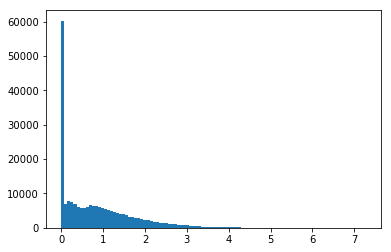

In [83]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

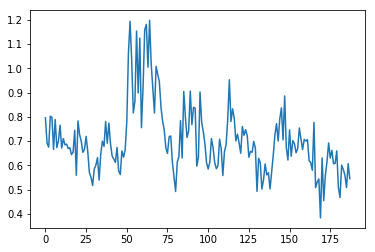

In [84]:
plt.plot(np.array(lst)[:,0,1200]);

In [85]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


In [86]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680 0.214113846231 1.45569366925
1681 0.215972096758 1.4399343644
1682 0.218039496136 1.46008733325
1683 0.218554024892 1.45477503867
1684 0.217169150858 1.47259473553
1685 0.21806044866 1.46956621039
1686 0.219308692161 1.45837098191
1687 0.220020701596 1.40190137457
1688 0.219921333936 1.40553053683
1689 0.45742948911 1.29874254233
1690 0.482186841313 1.30320632441
1691 0.499188748369 1.32537504196
1692 0.522750301114 1.30877350593


In [87]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.86446


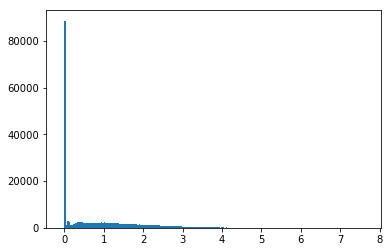

In [88]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.841708


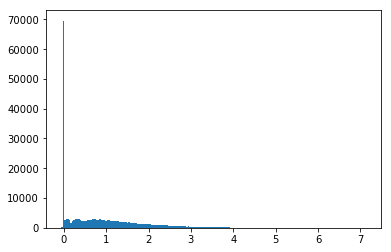

In [89]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.831592


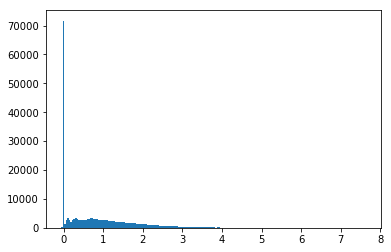

In [91]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.842092


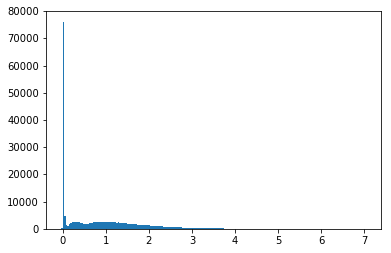

In [90]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [92]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21992133393556157

In [93]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.22002070159590484

In [94]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.45742948910970593

(54, 4100) 0.831592


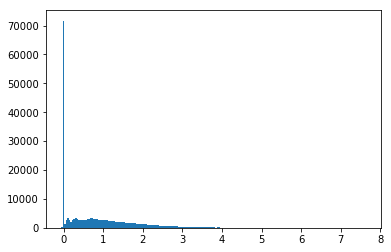

In [95]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [52]:
c=np.arange(60).reshape([3,4,5])

In [53]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True